# Лабораторна робота №3

## Частина №1

Генеруємо 10^4 випадкових величин, розподілених за законом розподілу Пуассона.

In [3]:
custom_lambda <- as.numeric(readline("Enter lambda: "))

Enter lambda: 2


In [4]:
X <- rpois(10000, custom_lambda)

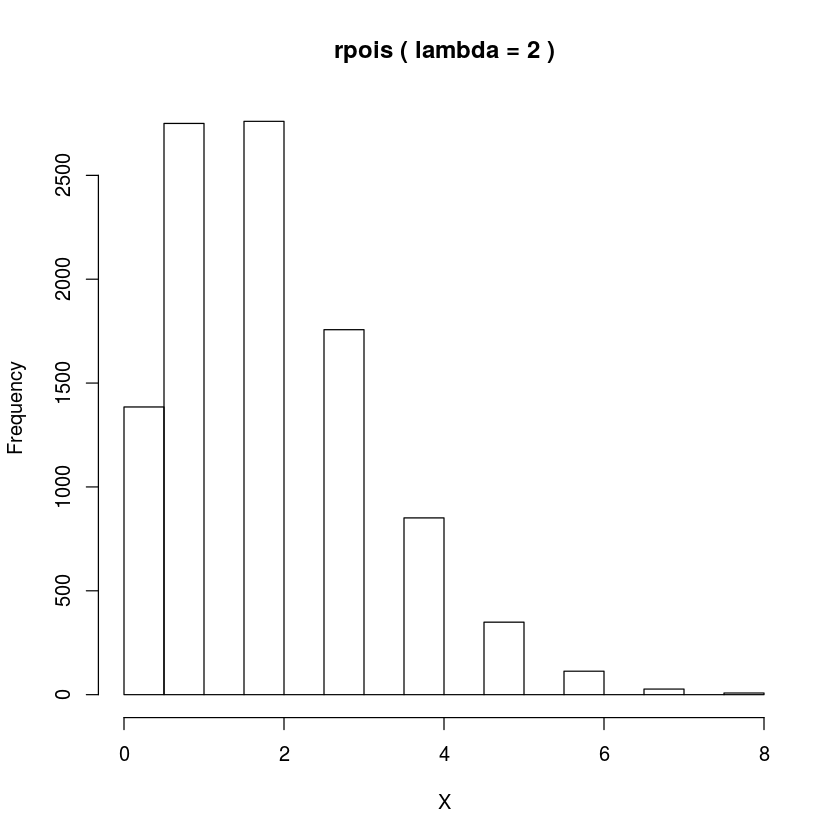

In [5]:
hist(X, main=paste("rpois ( lambda =", custom_lambda, ")"))

Функція розподілу випадково розподіленої величини за законом Пуассона.

In [6]:
chi_square_poison_test <- function(dataset) {
    size_of_dataset = length(dataset)
    
    lambda = mean(dataset)
    
    F <- function(i, lambda) {(lambda ^ i) * exp(-lambda) / factorial(i)}
    
    max <- max(dataset)
    min <- min(dataset)
     
    xi <- c()
    ni <- c()
    
    for (x in min:max) {
        if (length(dataset[dataset == x] > 0)) {
            xi <- append(xi, x)
            ni <- append(ni, length(dataset[dataset == x]))
        }
    }
  
    actual_frequency <- list()
    theoretical_frequency <- list()
    Chi_Square_actual <- 0
    
    for (i in 1:length(xi)) {
        actual <- 0  
        
        theoretical = size_of_dataset * F(xi[[i]], lambda)
          
        Chi_Square_actual <- Chi_Square_actual + (((ni[[i]] - theoretical) ^ 2) / theoretical)
    }
    
    Chi_Square_critical <- qchisq(p = 0.95, df = length(xi) - 2)
    
    print(paste("Actual: ", Chi_Square_actual))
    print(paste("Critical: ", Chi_Square_critical))
    
    return(Chi_Square_actual < Chi_Square_critical)
}

In [7]:
chi_square_poison_test(X)

[1] "Actual:  2.65475903305964"
[1] "Critical:  14.0671404493402"


[1] TRUE

## Частина №2

In [8]:
F = function(args, lambda) {
    funct <- c()
    for (x in args) {
        sum <- 0
        for (i in 0:x) {
            sum <- sum + (lambda ^ i) * exp(-lambda) / factorial(i)
        }
        funct <- append(funct, sum)
    }
    return(funct)
}

Графіки реалізацій випадкової величини

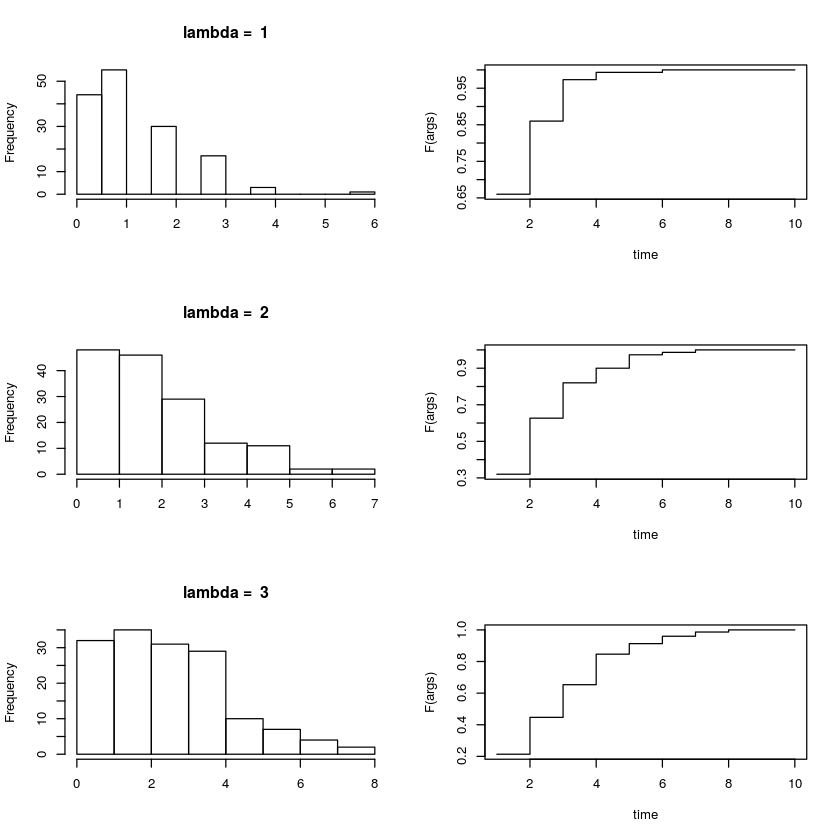

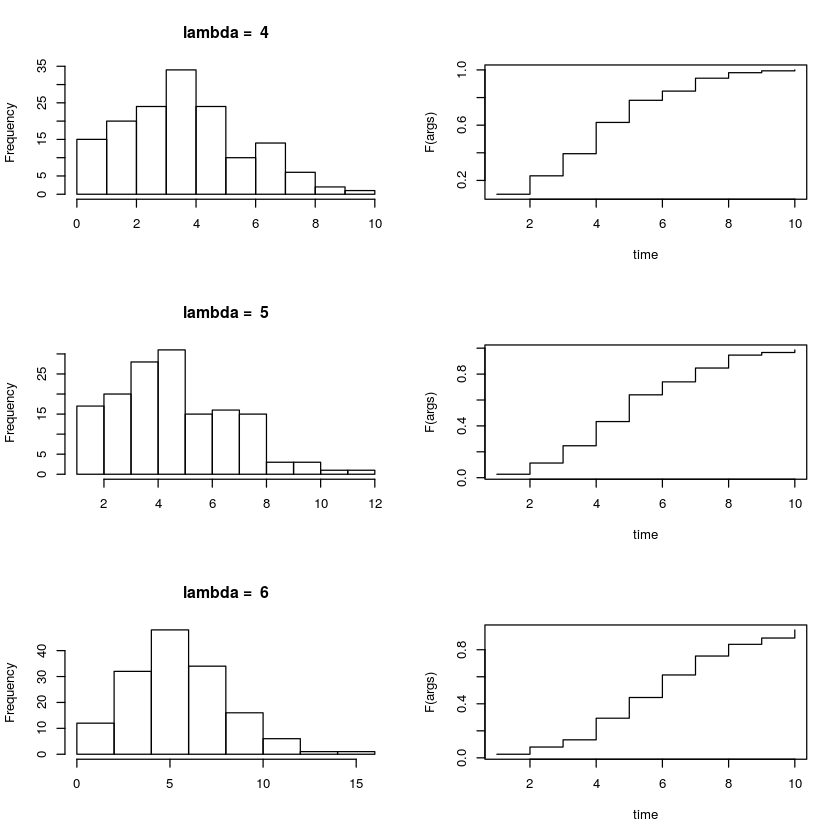

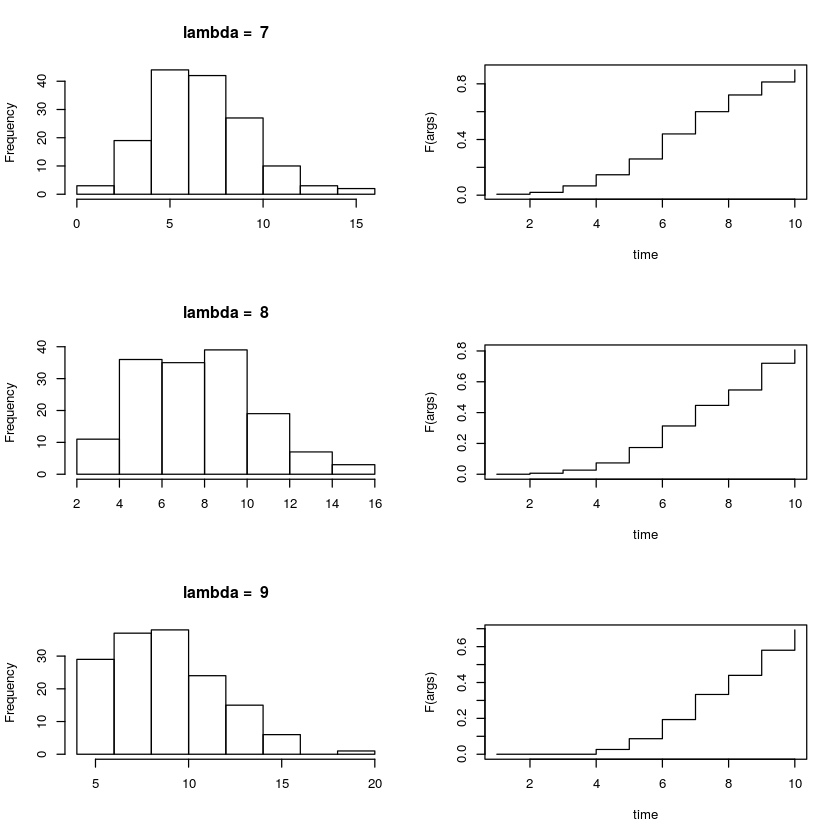

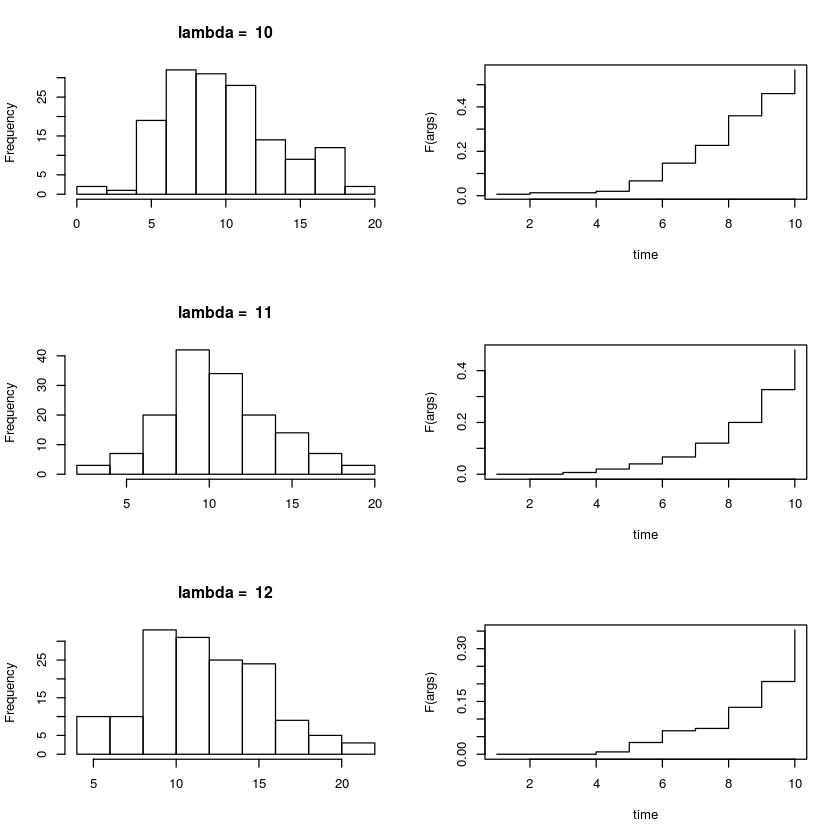

In [24]:
par(mfrow=c(3,2))

for (i in 1:12) {
    data <- rpois(150, i)
    F = ecdf(data)
    args = c(1:10)
    
    hist(data, main=paste("lambda = ", i), xlab=NULL)
    plot(args, F(args), main=NULL, type='s', xlab="time")
}

## Частина №3

Згідно варіанту лабораторної роботи, задані наступні константи

In [10]:
k <- 5
n <- 17

Функція розподілу для розподілу Пуассона визначається наступним чином:
$F(t) = P \{\tau < t\} = 1 - e^{-\lambda t}$.

Тобто, розподіл інтервалу між подіями задається функцією розподілу 
$P\{0 < \tau < \Delta t\} = P\{\tau < \Delta t\} - P\{\tau < 0\} = e^{0} - e^{-\lambda \Delta t} = 1 - e^{-\lambda \Delta t}$ 

In [11]:
F <- function(delta, lambda) {
    1 - exp(-lambda * delta)
}

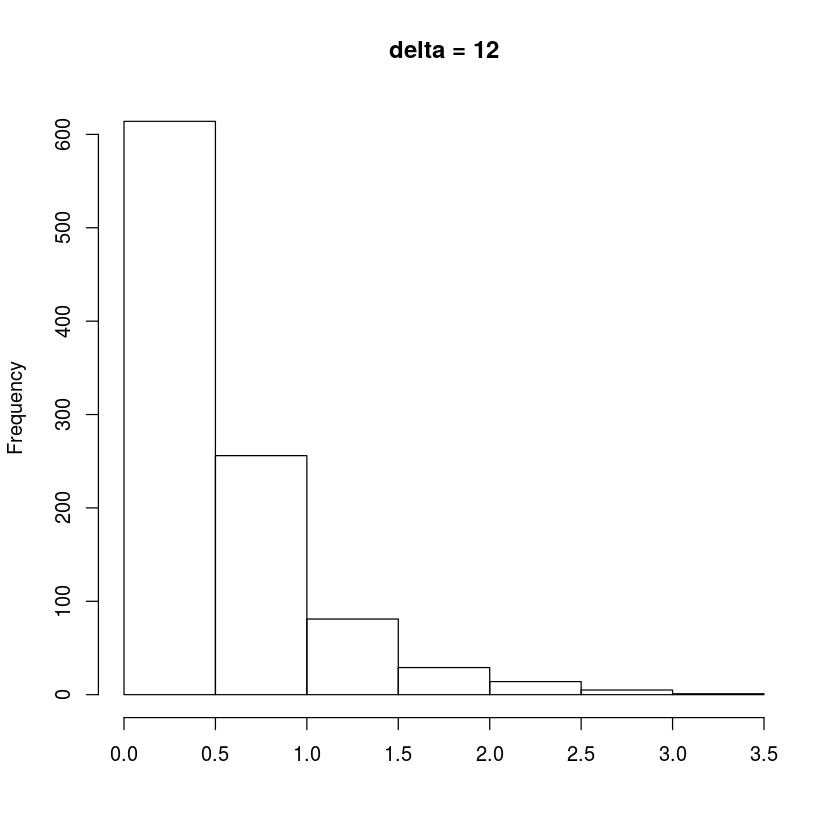

In [31]:
distribution <- rexp(1000, rate=custom_lambda)
hist(distribution, main=paste("delta =", delta), xlab=NULL)

### Час настання k-ї події.

In [13]:
k_times <- c()

for (i in 1:1000) {
    period <- 0
    while (TRUE) {
        simulation <- rpois(1, custom_lambda)[[1]]
        if (simulation == k) {
            break
        } else {
            period <- period + 1
        }
    }
    times <- append(times, period)
}

ERROR: Error in append(times, period): object 'times' not found


In [14]:
hist(times, main="Час настання k-ї події", xlab="Time")

ERROR: Error in hist(times, main = "Час настання k-ї події", : object 'times' not found


### Час настання рівно n подій

In [15]:
n_times <- c()

for (i in 1:1000) {
    time <- 0
    l <- 15
    
    dset <- rpois(20, l)
    while (length(unique(dset)) != 20) {
        dset <- append(dset, rpois(1, l)[[1]])
        time <- time + 1
    }
    
    n_times <- append(n_times, time)
}

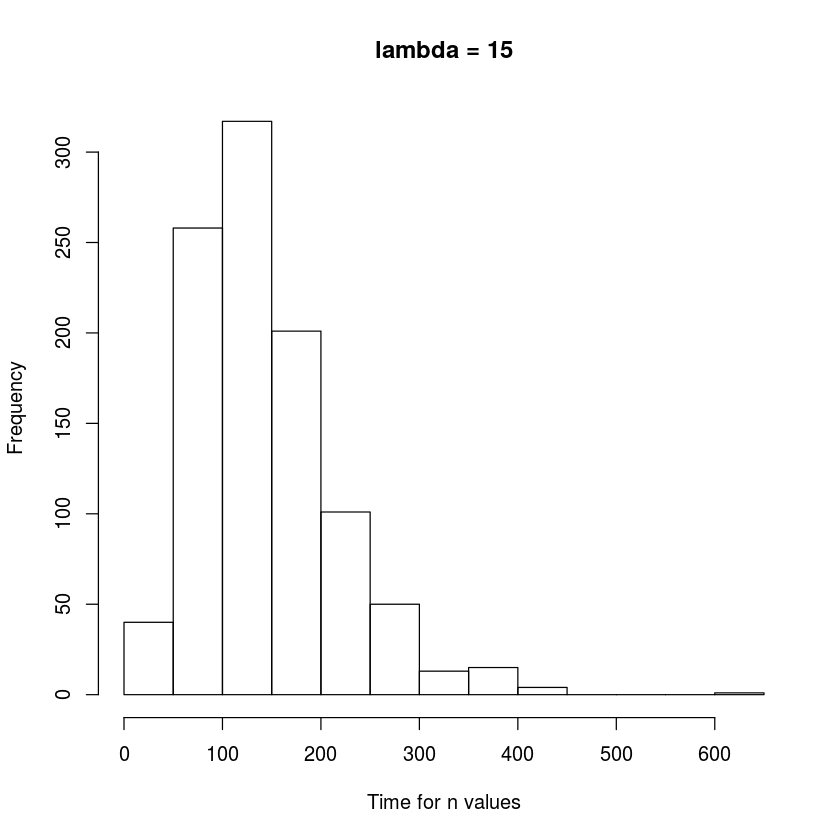

In [16]:
hist(n_times, main="lambda = 15", xlab="Time for n values")